## 人工智能编程基础（试学班）

## 项目：我的微信好友

在这个notebook文件中，有些模板代码已经提供给你，但你还需要实现更多的功能来完成这个项目。除非有明确要求，你无须修改任何已给出的代码。以**'(练习)'**开始的标题表示接下来的代码部分中有你需要实现的功能。这些部分都配有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示。

除了实现代码外，你还**需要**回答一些与项目及代码相关的问题。每个需要回答的问题都会以 **'问题 X'** 标记。请仔细阅读每个问题，并且在问题后的 **'回答'** 部分写出完整的答案。我们将根据 你对问题的回答 和 撰写代码实现的功能 来对你提交的项目进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---

### 让我们开始吧

在这个项目中，你将读取微信好友数据，并做一些有趣的统计和分析:P

### 项目内容

我们将这个notebook分为不同的步骤，你将完成以下5个任务：

**任务0 - 读取数据**

**任务1 - 统计微信好友的男女比例**

**任务2 - 分析微信好友的地域分布**

**任务3 - 生成微信好友的签名词云图**

**任务4 - 对签名进行情感分析**

In [2]:
### 配置环境，安装项目所需package，此部分代码只需运行一次即可
### 无需修改以下代码
!pip install -r requirements.txt
!conda install -c conda-forge wordcloud --y

    100% |████████████████████████████████| 317kB 1.5MB/s ta 0:00:01
    100% |████████████████████████████████| 3.6MB 150kB/s eta 0:00:01   21% |███████                         | 798kB 7.7MB/s eta 0:00:01
    100% |████████████████████████████████| 37.6MB 16kB/s  eta 0:00:01  6% |██▎                             | 2.6MB 25.0MB/s eta 0:00:02    13% |████▎                           | 5.1MB 29.6MB/s eta 0:00:02    23% |███████▍                        | 8.7MB 26.2MB/s eta 0:00:02    26% |████████▍                       | 9.9MB 29.6MB/s eta 0:00:01    29% |█████████▍                      | 11.0MB 22.2MB/s eta 0:00:02    32% |██████████▌                     | 12.3MB 26.8MB/s eta 0:00:01    38% |████████████▎                   | 14.4MB 17.3MB/s eta 0:00:02    53% |█████████████████               | 19.9MB 22.8MB/s eta 0:00:01    55% |██████████████████              | 21.0MB 23.8MB/s eta 0:00:01    64% |████████████████████▊           | 24.3MB 25.9MB/s eta 0:00:01    67% |█████████████████████▊

---

## 任务0. 登陆并发送打招呼信息

### 导入项目所需包

In [14]:
### 以下内容无需改动，直接运行即可
# 导入项目中所需要的包
import pandas as pd
import re
import os 
import numpy as np
import pinyin
import matplotlib.pyplot as plt
%matplotlib inline

print("所有库导入成功！")

所有库导入成功！


---
**注意：在教室中，我们仅提供假数据来完成项目，如果您倾向于探索自己微信好友的数据，您可以前往此[链接](https://github.com/udacity/AIPND-cn-trial)下载文件，并在本地运行。**

In [15]:
### 以下内容无需改动，直接运行即可
# 读取数据
dataset = pd.read_csv('wechat_friends.csv').fillna('').to_dict('records')

---

---

## 任务1. 好友男女比例

根据我们希望探索的问题，需要从数据集中取出以下几个部分：
- NickName：微信昵称
- Sex：性别，1表示男性，2表示女性
- Province：省份
- City：城市
- Signature：微信签名

### 练习：打印数据
* 打印`dataset`的数据类型
* 打印`dataset`中的第一条数据，以及其数据类型。
* 打印`dataset`中第一条数据的微信昵称

In [5]:
### TODO：打印dataset的数据类型
print(type(dataset))

<class 'list'>


In [6]:
### TODO：打印第一条数据及数据类型
print(dataset[0])
print(type(dataset[0]))

{'NickName': 'Myself', 'Province': '江苏', 'City': '南京', 'Sex': 2.0, 'Signature': 'Enjoy<span class="emoji emoji1f49d"></span>'}
<class 'dict'>


In [7]:
### TODO：打印第一条数据的微信昵称
print(dataset[0]['NickName'])

Myself


### **问题2**
dataset的数据类型是什么？dataset中第一条数据的数据类型呢？根据你的理解，这两种数据类型的区别是什么？

1.list列表；2.dict字典；3.列表有序，按元素存（元素也可以是其他数据类型），查找插入删除随着列表规模增加而增加 而字典是无序，按键值对（key:value)存，查找插入删除操作更快

### 练习：统计男女比例
- 统计好友性别，分为男性、女性与未知三种，赋值到已经定义好的`sex`字典中。

提示：
- `dataset`中1表示男性、2表示女性；
- *注意*：数据需要从第1条开始计算，因为**第0条是自己**。

In [8]:
# TODO：统计好友性别
sex = {
    'male': 0,
    'female': 0,
    'unknown': 0
}
# 性别判断函数：sex_dete 形参：x 实参：Sex键对应的值 格式已修改 注意了缩进
def sex_dete(x): 
    if x == 1.0:
        sex['male'] += 1
    elif x == 2.0:
        sex['female'] += 1
    else:
        sex['unknown'] += 1
# 遍历dataset来判断性别
for i in range(1,len(dataset)):
    sex_dete(dataset[i]['Sex'])

In [9]:
### 以下内容无需改动，直接运行即可
print("我的好友中共有", sex['male'],"位男性、", sex['female'], "位女性，有", sex['unknown'], "位好友未填写。")

我的好友中共有 77 位男性、 23 位女性，有 9 位好友未填写。


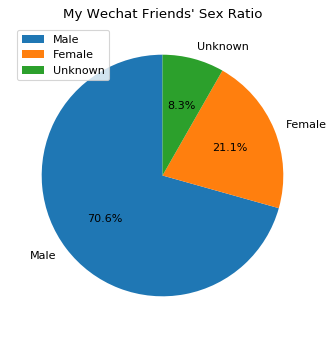

In [10]:
### 以下内容无需改动，直接运行即可
plt.figure(figsize=(8,5), dpi=80)
plt.axes(aspect=1) 
plt.pie([sex['male'], sex['female'], sex['unknown']],
        labels=['Male','Female','Unknown'],
        labeldistance = 1.1,
        autopct = '%3.1f%%',
        shadow = False,
        startangle = 90,
        pctdistance = 0.6 
)

plt.legend(loc='upper left',)
plt.title("My Wechat Friends' Sex Ratio")
plt.show()

这段代码的作用是绘制饼图，是不是很有趣？

**饼状图**是一种常见的单变量图形，用于描绘分类变量级别的相对频率。饼图中的频率用圆形的扇区表示：角度或面积越大，该分类值就越常见。

在「人工智能编程基础」这门课的第二章节中，将讲解如何使用`matplotlib`和`seaborn`绘制各种统计图表，进行数据可视化。

---

## 任务2. 好友地域分布
### 练习：统计好友省份
使用`list`中`append()`方法将好友省份添加至`province`中，注意**要去除空的字符串**

提示：可以用`for`循环实现

*注意*：数据需要从第1条开始计算，因为**第0条是自己**。

In [11]:
### TODO：将好友所在省份（不为空）添加到 province 中
# 这里根据上次审阅建议使用 列表推导式 生成province 没有使用append()方法插入
# 相对原本多行 这次仅一行 似乎更简洁？我感觉是不是有点太长了...?
province = [dataset[i]['Province'] for i in range(1,len(dataset)) if dataset[i]['Province'] != '']

In [12]:
### 以下内容无需修改，直接运行即可
province = [pinyin.get(i, format="strip", delimiter="") for i in province if i != '']

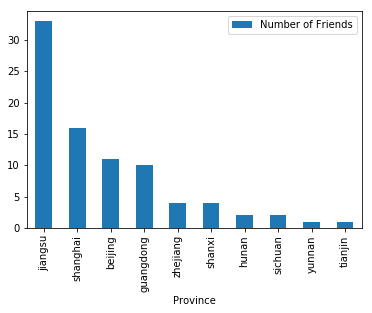

In [13]:
### 以下内容无需修改，直接运行即可
province = pd.DataFrame(province)
province.columns = ['Province']
province['Number of Friends'] = 1
province.groupby('Province').sum().sort_values('Number of Friends', ascending=False)[:10].plot.bar()

**条形图**用于描述分类变量的分布情况。在条形图中，分类变量的每个级别用长条表示，高度表示数据在该级别的出现频率。

---

## 任务3. 生成好友个性签名词云图

在这里我们希望生成词云，只需要调用第三方库即可，Python有大量的库可以使用，能极大提高开发效率，是编程入门的绝佳选择。

### 练习：打印个性签名
* 使用`print()`语句打印出最长的3个个性签名

In [28]:
### TODO：打印最长的3个个性签名 
signatures = [dataset[i]['Signature'] for i in range(len(dataset))]
"""
原先助教建议我们使用 deepcopy 来防止修改数据列表时候 造成原始数据的也被修改
普通的赋值操作 在python里感觉类似曾经学C++时候老师说的 引用 操作 
两个变量本质上指向的是同一个东西 当我们修改其中某个变量时候 另一个也会发生相应改变
而 deepcopy 解决这个问题 相当于做了一个“隔离”措施 复制出一个 数据一样 但是 独立互不影响
不知道这样理解是否正确！若有问题希望指出！感谢！
"""
"""
使用sorted方法（会建立一个新的list 不在原有list上操作 无需deepcopy了）按字符串长度排序
这里使用len(i)作为排序的关键字 reverse为True 非正序 即降序排列
lambda是一个匿名函数(懒得新建函数时候可用) lambda i:len(i) 即输入i 返回i的长 i是形参
参考了 https://blog.csdn.net/moxiaobeimm/article/details/80702496 和 https://www.cnblogs.com/hf8051/p/8085424.html
"""
len_descending_signatures = sorted(signatures,key = lambda i:len(i),reverse = True)
for i in range(3):
    print("第" , i+1 , "长的签名是：" , len_descending_signatures[i])

第 1 长的签名是： 除了努力之外就还是努力<span class="emoji emoji1f4aa"></span>
第 2 长的签名是： I am tired of reading stories about great men.
第 3 长的签名是： I will love you with every beat of my heart.


In [29]:
### 以下内容无需修改，直接运行即可
from wordcloud import WordCloud
import jieba

tList = []
for i in dataset:
    signature = i["Signature"].replace(" ", "").replace("span", "").replace("class", "").replace("emoji", "")
    rep = re.compile("1f\d.+")
    signature = rep.sub("", signature)
    if len(signature) > 0:
        tList.append(signature)
    
text = "".join(tList)

wordlist_jieba = jieba.cut(text, cut_all=True)
wl_space_split = " ".join(wordlist_jieba)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.318 seconds.
Prefix dict has been built succesfully.


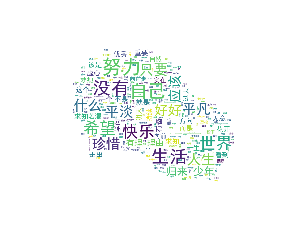

In [30]:
### 以下内容无需修改，直接运行即可
import PIL.Image as Image

alice_coloring = np.array(Image.open("wechat.jpg"))

my_wordcloud = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
                         max_font_size=40, random_state=42, font_path='./SimHei.ttf').generate(wl_space_split)


plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

my_wordcloud.to_file(os.path.join("wechatfriends_wordcloud.png"))

---

## 任务4. 对好友签名进行情感分析

在这部分内容中，我们调用了[SnowNLP](https://github.com/isnowfy/snownlp)的情感分析，它是一个python写的类库，可以方便的处理中文文本内容，不用我们实现其中具体的代码。一般来说，情感分析的目的是为了找出作者观点的态度，是正向还是负向，或者更具体的，我们希望知道他的情绪。

在这里，我们希望了解到好友签名所表达出来的情感是积极的，还是中立、负面的，比如说在以下例子中，我们对"这个商品我非常喜欢，颜色很合我意！"这句话进行了预处理，并通过训练好的模型预测其的情感。

在这里，我们简单地假设大于0.66表示积极，低于0.33表示消极，其他表示中立。

运行以下代码试试看！

In [31]:
### 以下内容无需修改，直接运行即可
from snownlp import SnowNLP

text = "这个商品我非常喜欢，颜色很合我意！"
sentiment = SnowNLP(text).sentiments

print(sentiment)

0.6851400314498396


接下来，我们将好友的签名进行文本预处理，并尝试统计其中积极、中立、消极的个数。

### 练习：统计好友签名情感分析结果比例
* 统计sentiments中**大于0.66**的个数
* 统计sentiments中**大于等于0.33且小于等于0.66**的个数
* 统计sentiments中**小于0.33**的个数

提示：可以用循环语句或者列表表达式实现。

In [32]:
### 以下内容无需修改，直接运行即可
sentiments = []
for i in tList:
    sentiments.append(SnowNLP(i).sentiments) 

In [51]:
### TODO：统计sentiments中大于0.66的个数
positive = None
positive = len([i for i in sentiments if i > 0.66]) # 列表推导式 遍历后变成列表然后算长
print("情感积极有：",positive)
### TODO：统计sentiments中大于等于0.33且小于等于0.66的个数
neutral = None
neutral = len([i for i in sentiments if i <= 0.66 and i >= 0.33])
print("情感中立有：",neutral)
### TODO：统计sentiments中小于0.33的个数
negative = None
negative = len([i for i in sentiments if i < 0.33])
print("情感消极有：",negative)

情感积极有： 63
情感中立有： 33
情感消极有： 8


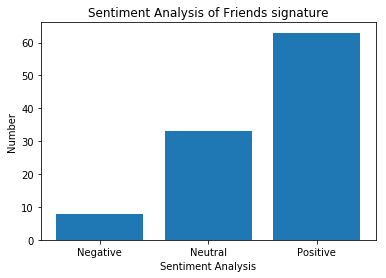

In [52]:
### 以下内容无需修改，直接运行即可
labels = [u'Negative',u'Neutral',u'Positive']
values = (negative,neutral,positive)
plt.xlabel(u'Sentiment Analysis')
plt.ylabel(u'Number')
plt.xticks(range(3),labels)
plt.bar(range(3), values)

plt.title('Sentiment Analysis of Friends signature')
plt.show()

**注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出File -> Download as -> HTML (.html)把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。**